# Clustering on Dimensionality-reduced Data
Using the Wine dataset

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.cluster import DBSCAN, KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.mixture import GaussianMixture

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score

pd.set_option('display.precision', 4)
pd.set_option('display.float_format', lambda x: '%.4f' % x)

In [2]:
cols = ['cultivar', 'alcohol', 'malic_acid', 'ash', 'ash_alk', 'magn', 'phenols',
        'flavonoids', 'non_flav_phenols', 'pro', 'color_int', 'hue', 'od', 'proline']
df = pd.read_csv('../data/wine.data', names=cols)

In [3]:
# Convert to matrices
X = df.iloc[:,1:14].values
y = df.iloc[:,0].values

In [4]:
X.shape

(178, 13)

## Scale the data

In [5]:
ss = StandardScaler()
X_scaled = ss.fit_transform(X)

At this point, I have the following datasets:

* `X_scaled` the scaled dataset
* `y` class labels (cultivars)

In [6]:
pd.DataFrame(X_scaled).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000,178.0000
mean,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,-0.0000
std,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028,1.0028
min,-2.4342,-1.4330,-3.6792,-2.6710,-2.0883,-2.1072,-1.6960,-1.8682,-2.0690,-1.6343,-2.0947,-1.8951,-1.4932
25%,-0.7882,-0.6587,-0.5721,-0.6891,-0.8244,-0.8855,-0.8275,-0.7401,-0.5973,-0.7951,-0.7676,-0.9522,-0.7846
50%,0.0610,-0.4231,-0.0238,0.0015,-0.1223,0.0960,0.1061,-0.1761,-0.0629,-0.1592,0.0331,0.2377,-0.2337
75%,0.8361,0.6698,0.6981,0.6021,0.5096,0.8090,0.8491,0.6095,0.6292,0.4940,0.7132,0.7886,0.7582
max,2.2598,3.1092,3.1563,3.1545,4.3714,2.5395,3.0628,2.4024,3.4851,3.4354,3.3017,1.9609,2.9715


## Reduce dimensionality
using PCA

In [7]:
pca = PCA(n_components=2)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [8]:
# These are the weights -- more precisely, the linear coefficients -- associated with each
# of the 13 predictors, for the first two principal components
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283]])

In [9]:
pc = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'])
pc['col'] = df.columns[1:]
pc

,PC1,PC2,col
0,0.1443,-0.4837,alcohol
1,-0.2452,-0.2249,malic_acid
2,-0.0021,-0.3161,ash
3,-0.2393,0.0106,ash_alk
4,0.1420,-0.2996,magn
5,0.3947,-0.0650,phenols
6,0.4229,0.0034,flavonoids
7,-0.2985,-0.0288,non_flav_phenols
8,0.3134,-0.0393,pro
9,-0.0886,-0.5300,color_int


In [10]:
X_pca = pca.transform(X_scaled)
print('Explained variance:', sum(pca.explained_variance_ratio_))

Explained variance: 0.5540633835693528


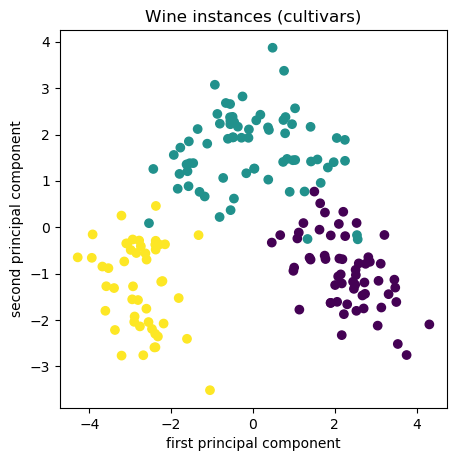

In [11]:
# Let's plot the data points on the first two principal components
fig = plt.figure(figsize=(5, 5), dpi=100)

ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_pca[:,0], X_pca[:,1], c=y)

ax.set_title('Wine instances (cultivars)')
ax.set_xlabel('first principal component')
ax.set_ylabel('second principal component')

plt.show()

## K-means on the PCA-reduced dataset

In [12]:
# Get true cluster centers
centers = []
labels = []
for thisy in np.unique(y):
    X_temp = X_pca[y==thisy]
    cx = np.mean(X_temp[:,0])
    cy = np.mean(X_temp[:,1])
    centers = centers + [cx, cy]
    labels = labels + [thisy]
centers_true = np.array(centers).reshape(-1, 2)

In [13]:
centers_true

array([[ 2.28273879, -0.96787356],
       [-0.03898598,  1.64348342],
       [-2.74819967, -1.24130798]])

In [14]:
km = KMeans(n_clusters=3)
y_pca = km.fit_predict(X_pca)

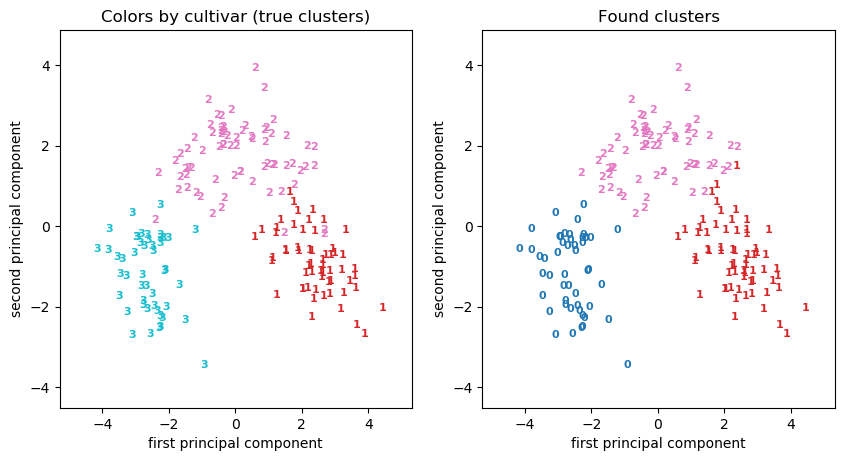

In [15]:
# Plot using pricipal components, color by true class (cultivar)
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.clf()

# First subplot - TRUE clusters
ax = fig.add_subplot(1, 2, 1)
for xx in range(X_pca.shape[0]):
    ax.text(X_pca[xx,0], X_pca[xx,1], str(y[xx]),
            color=plt.cm.tab10(y[xx]/3.),
           fontdict={'weight': 'bold', 'size': 8})

ax.set_xlim(np.min(X_pca[:,0])-1, np.max(X_pca[:,0])+1)
ax.set_ylim(np.min(X_pca[:,1])-1, np.max(X_pca[:,1])+1)

ax.set_title('Colors by cultivar (true clusters)')
ax.set_xlabel('first principal component')
ax.set_ylabel('second principal component')

# ----------------

# Second subplot - FOUND clusters
ax2 = fig.add_subplot(1, 2, 2)
for xx in range(X_pca.shape[0]):
    ax2.text(X_pca[xx,0], X_pca[xx,1], str(y_pca[xx]),
            color=plt.cm.tab10(y_pca[xx]/3.),
           fontdict={'weight': 'bold', 'size': 8})

ax2.set_xlim(np.min(X_pca[:,0])-1, np.max(X_pca[:,0])+1)
ax2.set_ylim(np.min(X_pca[:,1])-1, np.max(X_pca[:,1])+1)

ax2.set_title('Found clusters')
ax2.set_xlabel('first principal component')
ax2.set_ylabel('second principal component')

plt.show()

### Assess accuracy with respect to the true clusters

In [16]:
accuracy_score(y, y_pca)

0.6966292134831461

In [27]:
# That's not right!
# We need to relabel the found clusters to match.
# Let's store the transformed values in a dict, and we'll use letters rather than numbers
# so we don't get into trouble if we rerun this cell
xfrm_lab_true = {1: 'A', 2: 'B', 3: 'C'}
labels_true = [xfrm_lab_true[x] for x in y]
xfrm_lab_km = {1: 'A', 2: 'B', 0: 'C'}
labels_km = [xfrm_lab_km[x] for x in y_pca]

In [28]:
# Let's try again
accuracy_score(labels_true, labels_km)

0.9662921348314607

## Gaussian Mixture Models on Isomap-reduced data
We'll try to find non-linear relationships

In [19]:
iso = Isomap()
iso.fit(X_scaled)

Isomap(eigen_solver='auto', max_iter=None, n_components=2, n_jobs=None,
    n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

In [20]:
X_iso = iso.transform(X_scaled)

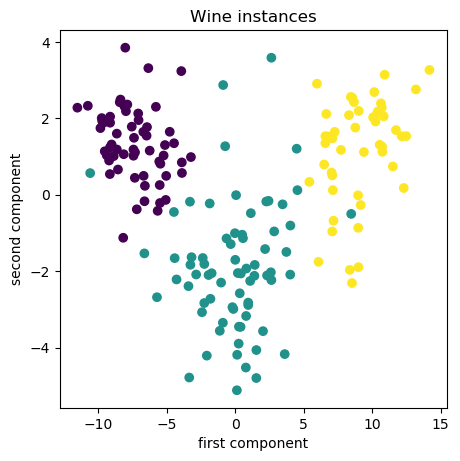

In [21]:
# Let's plot the data points on the first two principal components
fig = plt.figure(figsize=(5, 5), dpi=100)

ax = fig.add_subplot(1, 1, 1)
ax.scatter(X_iso[:,0], X_iso[:,1], c=y)

ax.set_title('Wine instances')
ax.set_xlabel('first component')
ax.set_ylabel('second component')

plt.show()

Let's try clustering using a Gaussian mixture model

In [22]:
gm = GaussianMixture(n_components=3)
gm.fit(X_iso)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
        means_init=None, n_components=3, n_init=1, precisions_init=None,
        random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [23]:
y_gm = gm.predict(X_iso)

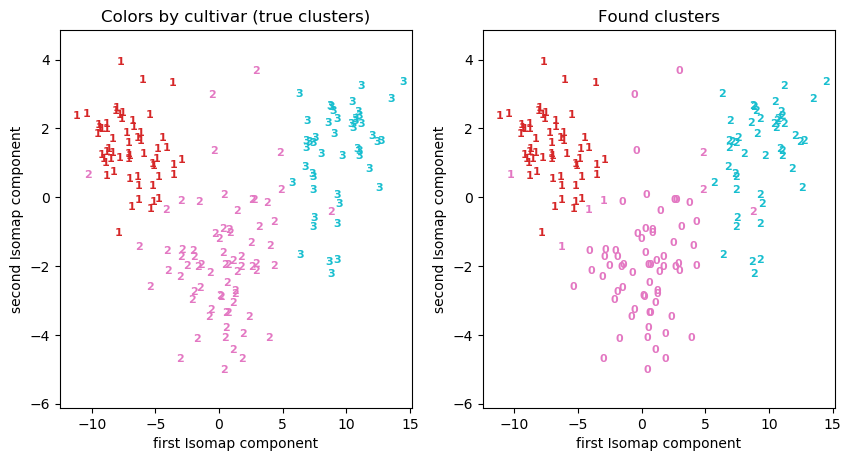

In [24]:
# Plot using Isomap components, color by true class (cultivar)
fig = plt.figure(figsize=(10, 5), dpi=100)
plt.clf()

# First subplot - TRUE clusters
ax = fig.add_subplot(1, 2, 1)
for xx in range(X_iso.shape[0]):
    ax.text(X_iso[xx,0], X_iso[xx,1], str(y[xx]),
            color=plt.cm.tab10(y[xx]/3.),
           fontdict={'weight': 'bold', 'size': 8})

ax.set_xlim(np.min(X_iso[:,0])-1, np.max(X_iso[:,0])+1)
ax.set_ylim(np.min(X_iso[:,1])-1, np.max(X_iso[:,1])+1)

ax.set_title('Colors by cultivar (true clusters)')
ax.set_xlabel('first Isomap component')
ax.set_ylabel('second Isomap component')

# ----------------

# Second subplot - FOUND clusters
ax2 = fig.add_subplot(1, 2, 2)
for xx in range(X_iso.shape[0]):
    ax2.text(X_iso[xx,0], X_iso[xx,1], str(y_gm[xx]),
            color=plt.cm.tab10(y[xx]/3.),
           fontdict={'weight': 'bold', 'size': 8})

ax2.set_xlim(np.min(X_iso[:,0])-1, np.max(X_iso[:,0])+1)
ax2.set_ylim(np.min(X_iso[:,1])-1, np.max(X_iso[:,1])+1)

ax2.set_title('Found clusters')
ax2.set_xlabel('first Isomap component')
ax2.set_ylabel('second Isomap component')

plt.show()

In [29]:
# That's not right!
# We need to relabel the found clusters to match.
# Let's store the transformed values in a dict, and we'll use letters rather than numbers
# so we don't get into trouble if we rerun this cell
xfrm_lab_iso_true = {1: 'A', 2: 'B', 3: 'C'}
lab_iso_true = [xfrm_lab_iso_true[yy] for yy in y]
xfrm_lab_iso_found = {1: 'A', 0: 'B', 2: 'C'}
lab_iso_found = [xfrm_lab_iso_found[yy] for yy in y_gm]

In [30]:
accuracy_score(lab_iso_found, lab_iso_true)

0.9606741573033708